# Stock Manipulation Proof Performance Measure (MPPM) Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [5]:
stock_returns = stocks.pct_change().dropna()

In [6]:
def mppm_stock(stock_returns, rf):
    T = len(stocks)
    gamma = stock_returns.std() #risk aversion
    equation1 = 1.0 / (1.0 - gamma)
    mppm = equation1 * math.log(1.0/T * (np.sum(((1.0 + stock_returns)/ (1+rf))**(1-gamma))))
    return mppm

Text(0, 0.5, 'Manipulation Proof Performance Measure')

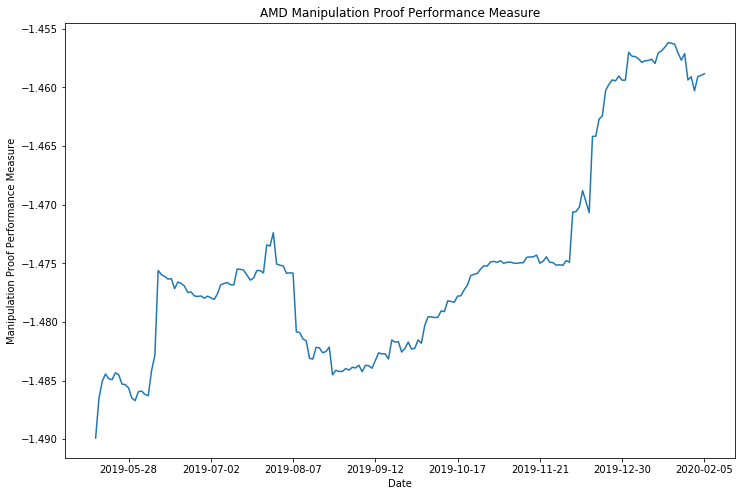

In [7]:
# Compute the running Manipulation Proof Performance Measure
running = [mppm_stock(stock_returns[i-90:i], rf[i-90:i]) for i in range(90, len(stock_returns))]

# Plot running Manipulation Proof Performance Measure up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stock_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Manipulation Proof Performance Measure')
plt.xlabel('Date')
plt.ylabel('Manipulation Proof Performance Measure')

In [8]:
mppm_stock = mppm_stock(stock_returns, rf)
mppm_stock

0.0005551719989575298

In [9]:
running

[-1.4899010046131955,
 -1.4865369091932736,
 -1.4850654003148147,
 -1.4844388432129125,
 -1.4848466351431768,
 -1.4849212081147691,
 -1.4843379397172043,
 -1.484492655108151,
 -1.4853001261410443,
 -1.485342909136447,
 -1.4856231199764878,
 -1.4864912431431458,
 -1.4867087187579557,
 -1.485943531139208,
 -1.4858963274188217,
 -1.4861817940952704,
 -1.4862866273998758,
 -1.4841460983463597,
 -1.4828459477222253,
 -1.475601053309214,
 -1.4759712058225836,
 -1.4761259672963802,
 -1.4763431121497035,
 -1.4763081214170946,
 -1.4771581867865609,
 -1.4765963878263353,
 -1.476719465304876,
 -1.4769441739886089,
 -1.477487219253915,
 -1.4774424676817617,
 -1.4777796671468064,
 -1.4778246756586342,
 -1.4777813704089644,
 -1.4779743512266725,
 -1.4778015893805356,
 -1.4779319950172103,
 -1.4780870752104083,
 -1.477616957690692,
 -1.476837596165631,
 -1.4767205046193645,
 -1.4766347783063734,
 -1.4768298064782892,
 -1.4768407898516673,
 -1.4754916270789336,
 -1.4755118098754625,
 -1.47558064577852